# Principal Component Analysis

Since this isn't exactly a full machine learning algorithm, but instead for reducing the dimentionality we will reduce dimensions to visulaize and create models
## PCA Review

PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data.

<img src='PCA.png' />

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Data

Let's work with the cancer data set again since it had so many features.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find principal components. Based on explained variance we will chose number of components, if components are able to explain more than 50% it is good to go. Visualize the data in this new, principle-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_data = scaler.transform(df)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().


In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=None)

In [13]:
X_pca = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]


it shows how many components can explain the variance in dataset, above 50% 
is fine.
0.4427 + 0.189 =.6317 its good enough to go
Now we can transform this data to its first 2 principal components.


In [14]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

In [15]:
scaled_data.shape

(569, 30)

In [16]:
x_pca.shape

(569, 2)

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

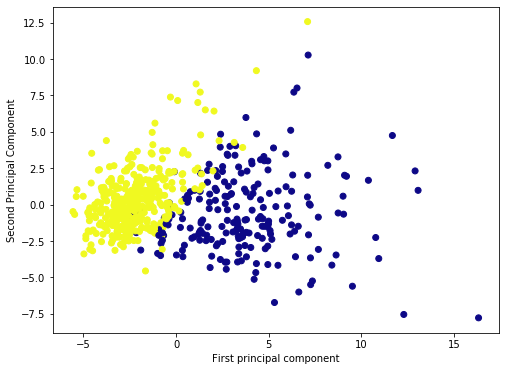

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

With this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [18]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [19]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

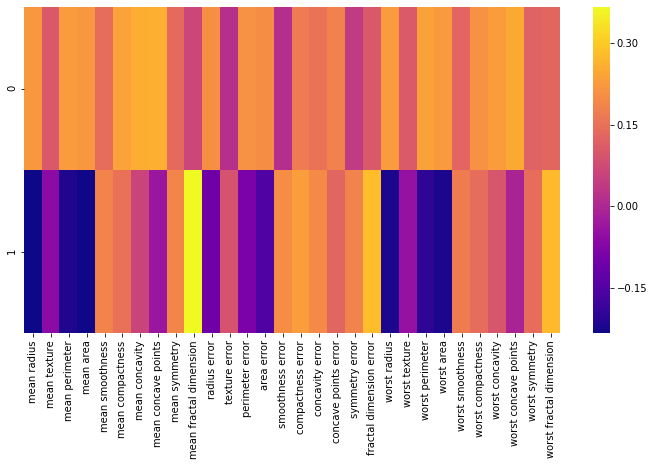

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

Hopefully this information is useful to you when dealing with high dimensional data!

## Using PCA for models, we will classify using models and then by using PCA to see the difference
We will use 2 models:
1. logistice regression
2. Random forest 

Without PCA and then with PCA.
For each model we will evaluate with confusion and Classificatioin matrix

# Train and test split
1. for data without PCA
2. for data with pca

In [21]:
X = df
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
Y = pd.DataFrame(cancer['target'])
Y.columns = ['Cancer']

In [23]:
Y.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=101)

In [26]:
X_pca_train,X_pca_test,Y_pca_Train,y_pca_test =train_test_split(x_pca,Y, test_size=0.25,random_state=101)

## Logistic Model without PCA

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Without PCA
lgwopca = LogisticRegression()
lgwopca.fit(X_train,y_train)
ypred_lgwopca= lgwopca.predict(X_test)
print(classification_report(y_test,ypred_lgwopca))
print(confusion_matrix(y_test,ypred_lgwopca))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        55
           1       0.97      0.94      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

[[52  3]
 [ 5 83]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate AUC Score 
Auc_Score = roc_auc_score(y_test,ypred_lgwopca)
print(Auc_Score)

0.9443181818181818


In [30]:
# predict probabilities not exact values
proby_wopca = lgwopca.predict_proba(X_test)
proby_wopca [:,:]


array([[6.98250439e-03, 9.93017496e-01],
       [4.83824487e-02, 9.51617551e-01],
       [4.00957495e-03, 9.95990425e-01],
       [9.99963263e-01, 3.67372967e-05],
       [5.64125204e-04, 9.99435875e-01],
       [8.87304587e-04, 9.99112695e-01],
       [3.18238610e-03, 9.96817614e-01],
       [9.99999999e-01, 8.07233379e-10],
       [6.48247635e-03, 9.93517524e-01],
       [1.87850702e-03, 9.98121493e-01],
       [9.82190941e-01, 1.78090589e-02],
       [9.03983812e-03, 9.90960162e-01],
       [5.28971476e-02, 9.47102852e-01],
       [8.00900227e-03, 9.91990998e-01],
       [9.99990709e-01, 9.29081279e-06],
       [2.17000994e-02, 9.78299901e-01],
       [4.07989094e-03, 9.95920109e-01],
       [6.33494565e-03, 9.93665054e-01],
       [1.00000000e+00, 2.40131541e-17],
       [1.73111320e-01, 8.26888680e-01],
       [5.51462877e-02, 9.44853712e-01],
       [1.36355752e-02, 9.86364425e-01],
       [2.14759548e-02, 9.78524045e-01],
       [1.74675546e-03, 9.98253245e-01],
       [9.990106

In [31]:
# we have probability for both 0 and 1 lets take any one column only
proby_wopca =proby_wopca[:,1]

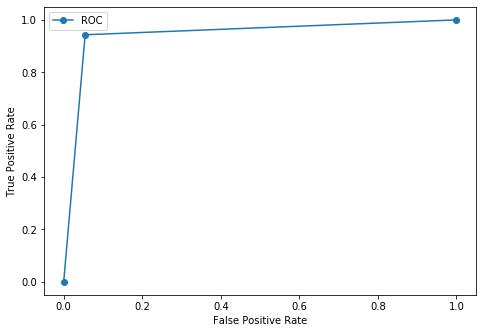

In [32]:
# Create ROC Curver:
fpr_wopca,tpr_wopca,_ = roc_curve(y_test,ypred_lgwopca)
prob_fpr_wopca,prob_tpr_wopca,_ =roc_curve(y_test,proby_wopca)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# Plot ROC Curver
ax.plot(fpr_wopca,tpr_wopca, marker='o', label='ROC')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
ax.legend()

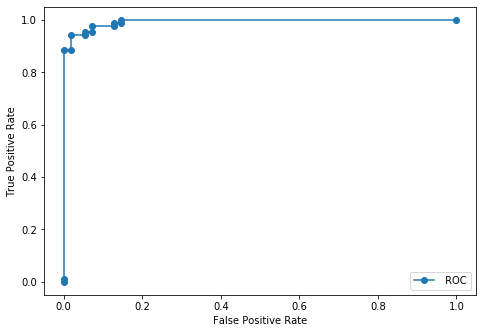

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# Plot ROC Curver
ax.plot(prob_fpr_wopca,prob_tpr_wopca, marker='o', label=' ROC')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
ax.legend()


## logistic model with PCA

In [34]:
# With PCA
lgwpca = LogisticRegression()
lgwpca.fit(X_pca_train,Y_pca_Train)
ypred_lgwpca= lgwpca.predict(X_pca_test)
print(classification_report(y_pca_test,ypred_lgwpca))
print(confusion_matrix(y_pca_test,ypred_lgwpca))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00      0.95      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

[[55  0]
 [ 4 84]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# calculate AUC Score 
Auc_Score = roc_auc_score(y_pca_test,ypred_lgwpca)
print(Auc_Score)

0.9772727272727273


In [36]:
# predict probabilities not exact values
proby_wpca = lgwpca.predict_proba(X_pca_test)
# we have probability for both 0 and 1 lets take any one column only
proby_wpca =proby_wpca[:,1]

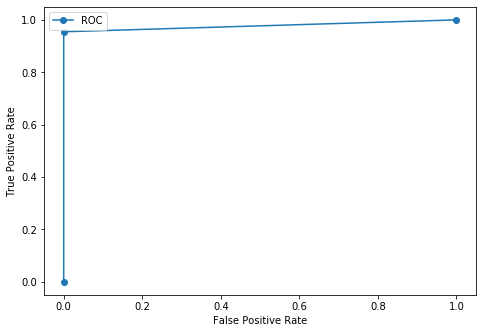

In [37]:
# Create ROC Curver:
fpr_wpca,tpr_wpca,_ = roc_curve(y_pca_test,ypred_lgwpca)
prob_fpr_wpca,prob_tpr_wpca,_ =roc_curve(y_pca_test,proby_wpca)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# Plot ROC Curver
ax.plot(fpr_wpca,tpr_wpca, marker='o', label='ROC')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
ax.legend()

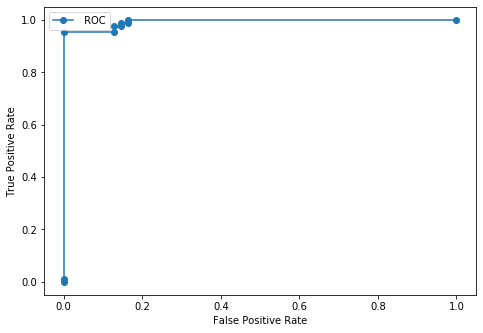

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# Plot ROC Curver
ax.plot(prob_fpr_wpca,prob_tpr_wpca, marker='o', label=' ROC')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
ax.legend()

## Random Forest Without PCA


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Without PCA
rfcwopca = RandomForestClassifier(n_estimators=50)
rfcwopca.fit(X_train,y_train)
ypred_rfcwopca= rfcwopca.predict(X_test)
print(classification_report(y_test,ypred_rfcwopca))
print(confusion_matrix(y_test,ypred_rfcwopca))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        55
           1       0.98      0.97      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

[[53  2]
 [ 3 85]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# calculate AUC Score 
Auc_Score = roc_auc_score(y_test,ypred_rfcwopca)
print(Auc_Score)

0.9647727272727272


In [42]:
# predict probabilities not exact values
proby_rfcwopca = rfcwopca.predict_proba(X_test)
# we have probability for both 0 and 1 lets take any one column only
proby_rfcwopca =proby_rfcwopca[:,1]

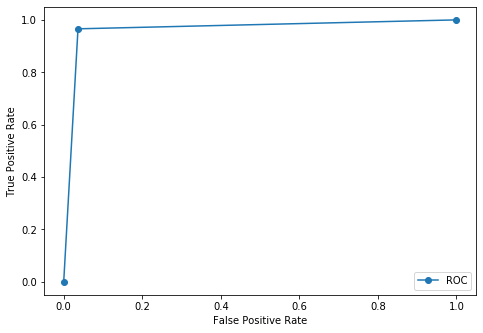

In [43]:
# Create ROC Curver:
fpr_rfcwopca,tpr_rfcwopca,_ = roc_curve(y_test,ypred_rfcwopca)
prob_fpr_rfcwopca,prob_tpr_rfcwopca,_ =roc_curve(y_test,proby_rfcwopca)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# Plot ROC Curver
ax.plot(fpr_rfcwopca,tpr_rfcwopca, marker='o', label='ROC')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
ax.legend()

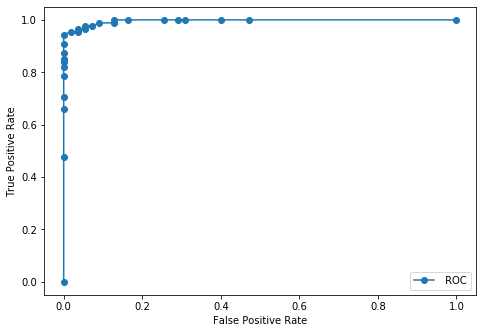

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# Plot ROC Curver
ax.plot(prob_fpr_rfcwopca,prob_tpr_rfcwopca, marker='o', label=' ROC')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
ax.legend()

## Random Forest with PCA

In [45]:
# With PCA
rfcwpca = RandomForestClassifier(n_estimators=50)
rfcwpca.fit(X_pca_train,Y_pca_Train)
ypred_rfcwpca= rfcwpca.predict(X_pca_test)
print(classification_report(y_pca_test,ypred_rfcwpca))
print(confusion_matrix(y_pca_test,ypred_rfcwpca))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        55
           1       0.98      0.93      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

[[53  2]
 [ 6 82]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# predict probabilities not exact values
proby_rfcwpca = rfcwpca.predict_proba(X_pca_test)
# we have probability for both 0 and 1 lets take any one column only
proby_rfcwpca =proby_rfcwpca[:,1]



In [47]:
# calculate AUC Score 
Auc_Score = roc_auc_score(y_pca_test,ypred_rfcwpca)
print(Auc_Score)

0.9477272727272726


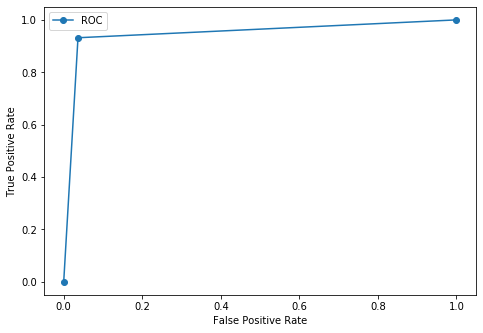

In [48]:
# Create ROC Curver:
fpr_rfcwpca,tpr_rfcwpca,_ = roc_curve(y_pca_test,ypred_rfcwpca)
prob_fpr_rfcwpca,prob_tpr_rfcwpca,_ =roc_curve(y_pca_test,proby_rfcwpca)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# Plot ROC Curver
ax.plot(fpr_rfcwpca,tpr_rfcwpca, marker='o', label='ROC')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
ax.legend()

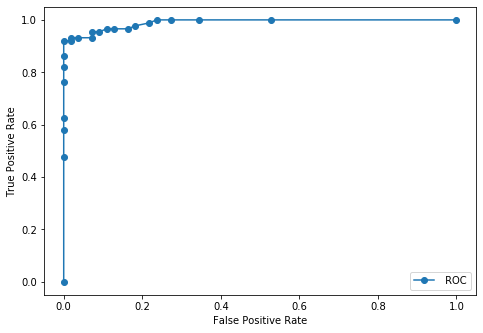

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# Plot ROC Curver
ax.plot(prob_fpr_rfcwpca,prob_tpr_rfcwpca, marker='o', label=' ROC')
# axis labels
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
# show the legend
ax.legend()

# Great Job!